# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')
from calc import *

# Make modified precip coupler forcings

In [3]:
dir_in='/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc/'
dir_out='/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc_Precipitation_increase20pct/'

In [4]:
fnames_all=glob.glob(dir_in+'*.nc')
fnames_ha2x1d=glob.glob(dir_in+'*ha2x1d*.nc')
fnames_ha2x1h=glob.glob(dir_in+'*ha2x1h*.nc')
fnames_ha2x3h=glob.glob(dir_in+'*ha2x3h*.nc')
#ha2x1hi

In [5]:
ds = xr.open_dataset(dir_in+'COUP0000_PI_SOM.cpl.ha2x1hi.0142-01.nc')

In [6]:
ds = xr.open_dataset(dir_in+'COUP0000_PI_SOM.cpl.ha2x3h.0142-01.nc')

In [7]:
print(len((fnames_all)))
print(len(fnames_ha2x1d)+len(fnames_ha2x1h)+len(fnames_ha2x3h))

6721
6721


In [8]:
for fname in fnames_ha2x3h[0:3]:
    ds=xr.open_dataset(fname)
    months=(np.unique(ds['time.month']))
    if (np.size(months)!=1):
        print('ERROR!')
    else:
        month=months[0]
        #print(month)
    #ds['a2x3h_Sa_shum']['time.month']#.mean(dim='time').plot()

In [9]:
ds

<xarray.Dataset>
Dimensions:           (a2x3h_nx: 144, a2x3h_ny: 96, ntb: 2, time: 248)
Coordinates:
  * time              (time) object 0061-01-01 01:30:00 ... 0061-01-31 22:30:00
Dimensions without coordinates: a2x3h_nx, a2x3h_ny, ntb
Data variables:
    time_bnds         (time, ntb) object ...
    a2x3h_Sa_z        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_topo     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_u        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_v        (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_tbot     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_ptem     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_shum     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_dens     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_pbot     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Sa_pslv     (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Faxa_lwdn   (time, a2x3h_ny, a2x3h_nx) float32 ...
    a2x3h_Faxa_rainc  (time, a2

## Check variable names

In [14]:
ds_1d = xr.open_dataset(fnames_ha2x1d[0]) #do not need to change
ds_1h = xr.open_dataset(fnames_ha2x1h[0]) #do not need to change
ds_3h = xr.open_dataset(fnames_ha2x3h[0])

In [15]:
for var in ds_1d.variables:
    print(var)

time
time_bnds
a2x1d_Faxa_bcphiwet
a2x1d_Faxa_bcphodry
a2x1d_Faxa_bcphidry
a2x1d_Faxa_ocphiwet
a2x1d_Faxa_ocphidry
a2x1d_Faxa_ocphodry
a2x1d_Faxa_dstwet1
a2x1d_Faxa_dstdry1
a2x1d_Faxa_dstwet2
a2x1d_Faxa_dstdry2
a2x1d_Faxa_dstwet3
a2x1d_Faxa_dstdry3
a2x1d_Faxa_dstwet4
a2x1d_Faxa_dstdry4
a2x1d_Sa_co2prog
a2x1d_Sa_co2diag


In [16]:
ds=ds
for var in ds.variables:
    if var not in ['time','time_bnds']:
        #print(var)
        print(ds[var].long_name)
        #print('-----------------')

latitude
longitude
cell_area_model
cell_area_mapping
mask
area_fraction
Direct near-infrared incident solar radiation
Direct visible incident solar radiation
Diffuse near-infrared incident solar radiation
Diffuse visible incident solar radiation


## Write out new files

In [10]:
var_to_change='a2x3h_Faxa_rainl'
var_to_change2='a2x3h_Faxa_rainc'
var_to_change3='a2x3h_Faxa_snowl'
var_to_change4='a2x3h_Faxa_snowc'
for i, fname_full in enumerate(fnames_ha2x3h):
    print(i)
    ds=xr.open_dataset(fname_full)
    fname_out=fname_full.split('/')[9]
    ds[var_to_change]=ds[var_to_change]*1.2
    ds[var_to_change2]=ds[var_to_change2]*1.2
    ds[var_to_change3]=ds[var_to_change3]*1.2
    ds[var_to_change4]=ds[var_to_change4]*1.2
    ds.to_netcdf(path=dir_out+fname_out,
                                format="NETCDF3_64BIT")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
test_orig=xr.open_dataset('/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc/'+
                         'COUP0000_PI_SOM.cpl.ha2x3h.0061-01.nc')
test_new=xr.open_dataset('/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc_increasePrecipitation/'+
                         'COUP0000_PI_SOM.cpl.ha2x3h.0061-01.nc')

In [17]:
delta_var_to_change=test_new[var_to_change]-test_orig[var_to_change]
delta_other_var=test_new['a2x3h_Faxa_swndf']-test_orig['a2x3h_Faxa_swndf']

In [18]:
print(np.nanmax(delta_var_to_change))
print(np.nanmean(delta_var_to_change))
print(np.nanmin(delta_var_to_change))

0.000100000005
0.000100000325
9.999995e-05


In [19]:
print(np.nanmax(delta_other_var))
print(np.nanmean(delta_other_var))
print(np.nanmin(delta_other_var))

0.0
0.0
0.0


# Check outputs are different

In [24]:
ds_original=xr.open_dataset('/glade/scratch/czarakas/archive/OFFL0000_PI_v18/lnd/hist/'+
                           'OFFL0000_PI_v18.clm2.h0.0049-02-01-00000.nc')
ds_new=xr.open_dataset('/glade/scratch/czarakas/archive/OFFL0000_PI_increasePrecip_test02/lnd/hist/'+
                       'OFFL0000_PI_increasePrecip_test02.clm2.h0.0049-02-01-00000.nc')

In [39]:
delta=(ds_new.EFLX_LH_TOT[1,:,:]-ds_original.EFLX_LH_TOT[1,:,:])

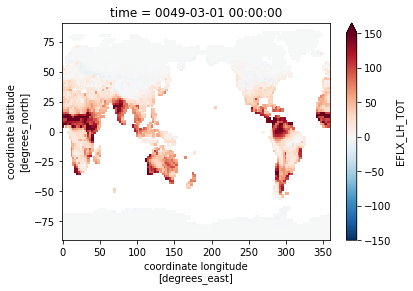

In [42]:
delta.plot(vmax=150)#vmax=1)#vmax=0.0002, vmin=-0.0001)